In [1]:
!pip install plotly geojson kaleido

In [5]:
import requests
import json
import geojson
import plotly.graph_objects as go

from IPython.display import JSON, Image

def response_to_FeatureCollection(response):
    """
    This function will return a geojson.FeatureCollection representation of the features found
    in the provided response.
    Parameters
    ----------
    response : requests.Response
        Response object returned from a GET request on the FTS rivers endpoint.
    Returns
    -------
    geojson.FeatureCollection
        FeatureCollection containing all features extracted from the response.
    """
    featureList = []
    for reach_id, reach_json in response.json()['results'].items():
        reach_feature = geojson.loads(json.dumps(reach_json['geojson']))
        reach_feature['properties']={k:v for k,v in reach_json.items() if k not in ['geojson', 'geometry']}
        featureList.append(reach_feature)
    featureCollection = geojson.FeatureCollection(featureList)
    return featureCollection

def estimate_center_of_FeatureCollection(featureCollection):
    """
    This function does a very simplistic estimation of the center of all features in the given FeatureCollection.
    Parameters
    ----------
    featureCollection : geojson.FeatureCollection
        Estimate the center lon, lat of this FeatureCollection.
    Returns
    -------
    tuple(float, float)
        Estimated center longitude, center latitude
    """
    lats = [xy[1] for feature in featureCollection['features'] for xy in feature['coordinates']]
    lons = [xy[0] for feature in featureCollection['features'] for xy in feature['coordinates']]

    center_lat = (min(lats) + max(lats)) / 2
    center_lon = (min(lons) + max(lons)) / 2
    
    return center_lon, center_lat

In [6]:
response = requests.get("https://fts.podaac.earthdata.nasa.gov/rivers/reach/74230900271")

featureCollection = response_to_FeatureCollection(response)

JSON(response.json())

<IPython.core.display.JSON object>

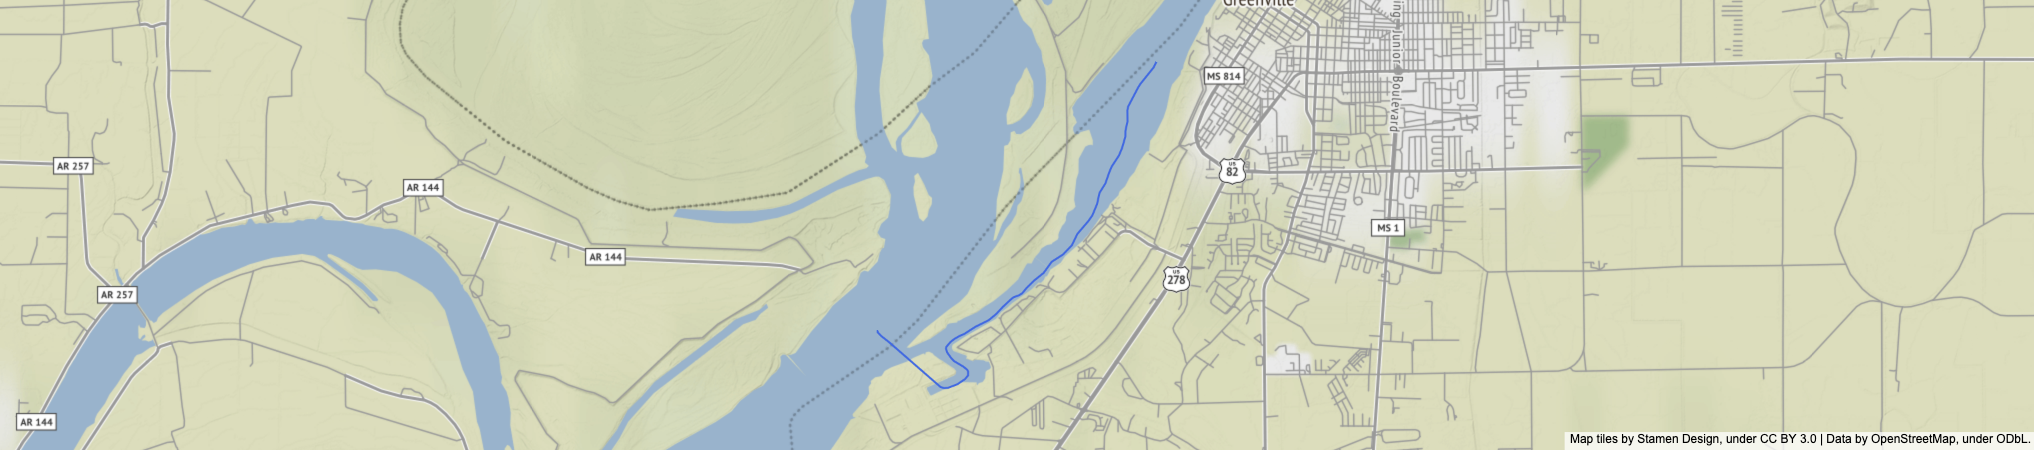

In [7]:

fig = go.Figure(
    go.Scattermapbox(),
    layout = {
        'mapbox': {
            'style': "stamen-terrain",
            'zoom': 12
        },
        'margin': {'l':0, 'r':0, 'b':0, 't':0},
    }
)

fig.update_mapboxes(layers=[
    {
        'source': feature, 
        'type': "line", 
        'below': "traces", 
        'color': "royalblue"
    } for feature in featureCollection.features])

center_lon, center_lat = estimate_center_of_FeatureCollection(featureCollection)

fig.update_layout(
    mapbox = {
        'center': { 'lon':  center_lon, 'lat': center_lat}
    }
)

fig.show()
# Image(fig.to_image(format="png", width=600, height=600))

In [ ]:
features = [geojson.loads(r['geojson']) for rid, r in reaches.json()['results'].items()]
featureCollection = geojson.FeatureCollection(features)


fig = go.Figure(go.Scattermapbox(mode='lines'))

fig.update_layout(
    mapbox = {
        'center': { 'lon': 42.58826463170101, 'lat': -0.06657401863412468},
        'zoom': 7, 'layers': [{
            'source': dict(featureCollection),
            'type': "fill", 'below': "traces", 'color': "royalblue"}]})

fig.show()


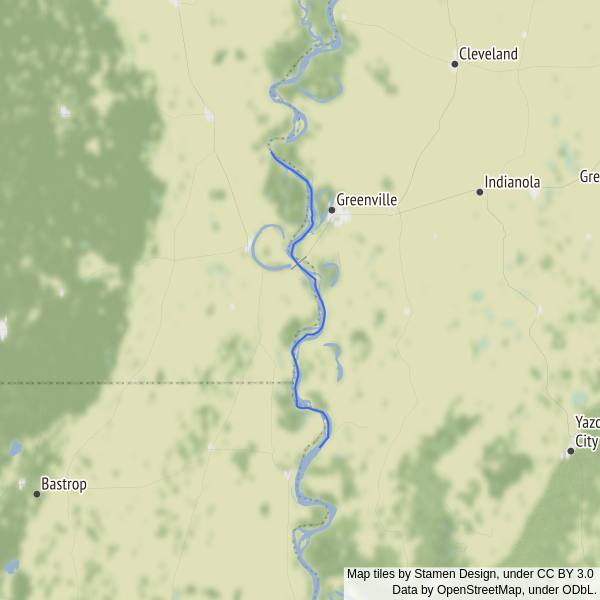

In [9]:
fig = go.Figure(
    go.Scattermapbox(),
    layout = {
        'mapbox': {
            'style': "stamen-terrain",
            'zoom': 8
        },
        'margin': {'l':0, 'r':0, 'b':0, 't':0},
    }
)

fig.update_mapboxes(layers=[
    {
        'source': feature, 
        'type': "line", 
        'below': "traces", 
        'color': "royalblue"
    } for feature in featureCollection.features])

center_lon, center_lat = estimate_center_of_FeatureCollection(featureCollection)

fig.update_layout(
    mapbox = {
        'center': { 'lon':  center_lon, 'lat': center_lat}
    }
)

Image(fig.to_image(format="png", width=600, height=600))